# Spaceship Titanic
----
## Predict which passengers are transported to an alternate dimension

- HUFS Data Scientist : Kim Juwon, Cho Kwonwhi, Baek Gunwoo

Summary : 
- This Data Analysis is done by Juwon Kim and for ML Modeling
- Using Pandas(Histogram), Heatmap to check Correlation, and Seaborn for Visualization
- Data Pre-processing was done using One-hot Encoding/Eliminating Missing Value/Standardization

# 1. Data Analysis

- Accurate data analysis is required to learn from the correct ML Model.
- For Machine Leraning, train data, and test data were loaded . The number of columns, names, and target data and the relationship between each variable was analyzed using various data analysis techniques such as histogram, heat map, and clustering.

## import Library
- pandas, numpy, seaborn, matplotblib.pyplot, seaborn

In [1]:
# Data Analyze
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
# 데이터 tqdm으로 살피기
import tqdm.notebook as tqdm

## Data Description

- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
  - PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
  - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  - Destination - The planet the passenger will be debarking to.
  - Age - The age of the passenger.
  - VIP - Whether the passenger has paid for special VIP service during the voyage.
  - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  - Name - The first and last names of the passenger.
  - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
- sample_submission.csv - A submission file in the correct format.
  - PassengerId - Id for each passenger in the test set.
  - Transported - The target. For each passenger, predict either True or False.
  
**ML Goal is to find out who is transported to other dimension or not**

## 0. Load Data

- Load Train, Test Data

In [2]:
train_data = pd.read_csv("./dataset/train.csv")
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
test_data = pd.read_csv("./dataset/test.csv")
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## 1. Data Preprocessing

- Remove missing values (fill with 0), convert categorical data into numerical form with one-hot encoding, and proceed with normalization.
- We checked how many missing values are in each column using isna() and sum() functions in pandas.

In [4]:
# Checking train data
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- Experiment 1. See How many Data Eliminated
  - 2087 of data were removed
  - About one-fourth of data was eliminated which means that data power decreased
  - But still, I will try with dropna() and fillna() during the ML Modeling

In [5]:
train_data.dropna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
# fill missing value with 0
train_data=train_data.fillna(0)
train_data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- pandas only has a datatype with int, float, bool, datetime64, category, object
- So object is usually String

In [7]:
print(train_data.columns)
print(train_data.dtypes)
print("행 열 :", train_data.shape)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
행 열 : (8693, 14)


- We have to Change Bool, object data to categorical data with one hot encoding
    - object : PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name
    - Bool : Transported 

- One hot Encoding for Bool 

In [8]:
train_data["Transported"] = train_data["Transported"].astype(int)

- Check Object Data 

In [9]:
# Date데이터의 연월일을 변환
PassengerId = dict()
HomePlanet= dict()
CryoSleep= dict()
Cabin= dict()
Destination= dict()
VIP= dict()
Name= dict()
for i in tqdm.tqdm(range(len(train_data['PassengerId']))):
    
    if train_data.iloc[i]["PassengerId"] in PassengerId : 
        PassengerId[train_data.iloc[i]["PassengerId"]]+=1
    else : 
        PassengerId[train_data.iloc[i]["PassengerId"]]=1
        
    if train_data.iloc[i]["HomePlanet"] in HomePlanet : 
        HomePlanet[train_data.iloc[i]["HomePlanet"]]+=1
    else : 
        HomePlanet[train_data.iloc[i]["HomePlanet"]]=1
        
    if train_data.iloc[i]["CryoSleep"] in CryoSleep : 
        CryoSleep[train_data.iloc[i]["CryoSleep"]]+=1
    else : 
        CryoSleep[train_data.iloc[i]["CryoSleep"]]=1
        
    if train_data.iloc[i]["Cabin"] in Cabin : 
        Cabin[train_data.iloc[i]["Cabin"]]+=1
    else : 
        Cabin[train_data.iloc[i]["Cabin"]]=1
        
    if train_data.iloc[i]["Destination"] in Destination : 
        Destination[train_data.iloc[i]["Destination"]]+=1
    else : 
        Destination[train_data.iloc[i]["Destination"]]=1
        
    if train_data.iloc[i]["VIP"] in VIP : 
        VIP[train_data.iloc[i]["VIP"]]+=1
    else : 
        VIP[train_data.iloc[i]["VIP"]]=1
        
    if train_data.iloc[i]["Name"] in Name : 
        Name[train_data.iloc[i]["Name"]]+=1
    else : 
        Name[train_data.iloc[i]["Name"]]=1

  0%|          | 0/8693 [00:00<?, ?it/s]

In [10]:
print(PassengerId)

{'0001_01': 1, '0002_01': 1, '0003_01': 1, '0003_02': 1, '0004_01': 1, '0005_01': 1, '0006_01': 1, '0006_02': 1, '0007_01': 1, '0008_01': 1, '0008_02': 1, '0008_03': 1, '0009_01': 1, '0010_01': 1, '0011_01': 1, '0012_01': 1, '0014_01': 1, '0015_01': 1, '0016_01': 1, '0017_01': 1, '0017_02': 1, '0020_01': 1, '0020_02': 1, '0020_03': 1, '0020_04': 1, '0020_05': 1, '0020_06': 1, '0022_01': 1, '0024_01': 1, '0025_01': 1, '0026_01': 1, '0028_01': 1, '0030_01': 1, '0031_01': 1, '0031_02': 1, '0031_03': 1, '0034_01': 1, '0035_01': 1, '0036_01': 1, '0038_01': 1, '0039_01': 1, '0041_01': 1, '0043_01': 1, '0044_01': 1, '0044_02': 1, '0044_03': 1, '0045_01': 1, '0045_02': 1, '0050_01': 1, '0051_01': 1, '0052_01': 1, '0053_01': 1, '0056_01': 1, '0056_02': 1, '0056_03': 1, '0058_01': 1, '0061_01': 1, '0062_01': 1, '0064_01': 1, '0064_02': 1, '0066_01': 1, '0067_01': 1, '0067_02': 1, '0067_03': 1, '0068_01': 1, '0069_01': 1, '0070_01': 1, '0071_01': 1, '0072_01': 1, '0073_01': 1, '0074_01': 1, '0076

In [11]:
print(HomePlanet)

{'Europa': 2131, 'Earth': 4602, 'Mars': 1759, 0: 201}


In [12]:
print(CryoSleep)

{False: 5656, True: 3037}


In [13]:
print(Cabin)

{'B/0/P': 1, 'F/0/S': 1, 'A/0/S': 2, 'F/1/S': 1, 'F/0/P': 1, 'F/2/S': 1, 'G/0/S': 1, 'F/3/S': 1, 'B/1/P': 3, 'F/1/P': 1, 'G/1/S': 1, 'F/2/P': 1, 0: 199, 'F/3/P': 1, 'F/4/P': 1, 'F/5/P': 1, 'G/0/P': 1, 'F/6/P': 1, 'E/0/S': 6, 'D/0/P': 1, 'C/2/S': 1, 'F/6/S': 1, 'C/0/P': 1, 'F/8/P': 1, 'G/4/S': 1, 'F/9/P': 3, 'D/1/S': 1, 'D/1/P': 1, 'F/8/S': 1, 'F/10/S': 1, 'G/1/P': 1, 'G/2/P': 1, 'B/3/P': 1, 'G/3/P': 3, 'F/10/P': 2, 'E/1/S': 1, 'E/2/S': 1, 'G/6/S': 1, 'F/11/S': 1, 'A/1/S': 3, 'G/7/S': 1, 'F/12/S': 1, 'F/13/S': 1, 'F/14/S': 1, 'E/3/S': 1, 'G/6/P': 1, 'G/10/S': 2, 'F/15/S': 1, 'E/4/S': 1, 'F/16/S': 1, 'F/13/P': 1, 'F/14/P': 1, 'F/17/S': 1, 'D/3/P': 1, 'C/3/S': 1, 'F/18/S': 1, 'F/15/P': 1, 'C/4/S': 1, 'G/13/S': 1, 'F/16/P': 3, 'G/14/S': 1, 'C/5/S': 1, 'F/17/P': 1, 'E/5/S': 1, 'G/15/S': 1, 'G/16/S': 1, 'F/20/S': 1, 'G/9/P': 3, 'A/2/S': 1, 'G/11/P': 2, 'F/19/P': 1, 'G/12/P': 1, 'F/23/S': 1, 'F/24/S': 1, 'G/18/S': 2, 'F/21/P': 1, 'D/2/S': 1, 'G/19/S': 3, 'B/5/P': 3, 'E/6/S': 1, 'B/1/S': 1, 'F

In [14]:
print(Destination)

{'TRAPPIST-1e': 5915, 'PSO J318.5-22': 796, '55 Cancri e': 1800, 0: 182}


In [15]:
print(VIP)

{False: 8494, True: 199}


In [16]:
print(Name)

{'Maham Ofracculy': 1, 'Juanna Vines': 1, 'Altark Susent': 1, 'Solam Susent': 1, 'Willy Santantines': 1, 'Sandie Hinetthews': 1, 'Billex Jacostaffey': 1, 'Candra Jacostaffey': 1, 'Andona Beston': 1, 'Erraiam Flatic': 1, 'Altardr Flatic': 1, 'Wezena Flatic': 1, 'Berers Barne': 1, 'Reney Baketton': 1, 'Elle Bertsontry': 1, 'Justie Pooles': 1, 'Flats Eccle': 1, 'Carry Hughriend': 1, 'Alus Upead': 1, 'Lyde Brighttt': 1, 'Philda Brighttt': 1, 'Almary Brantuarez': 1, 'Glendy Brantuarez': 1, 'Mollen Mcfaddennon': 1, 'Breney Jacostanley': 1, 'Mael Brantuarez': 1, 'Terta Mcfaddennon': 1, 0: 200, 'Penton Fullided': 1, 'Karard Brookenson': 1, 'Anyoni Unconary': 1, 'Ceros Mare': 1, 'Ginia Morsentley': 1, 'Coobix Datie': 1, 'Cinets Datie': 1, 'Dontch Datie': 1, 'Ziba Oingwhedly': 1, 'Luse Butte': 1, 'Marina Leodger': 1, 'Loise Wheelez': 1, 'Jorgie Batthewitt': 1, 'Margia Moodsey': 1, 'Ankalik Cylistrand': 1, 'Jodye Coopelandez': 1, 'Kayne Coopelandez': 1, 'Cassa Coopelandez': 1, 'Zelowl Chmad': 1, 

- VIP, CryoSleep Turn to have Bool Data
- Name/Passenger ID Doesn't needed ( it is not categorical data, it is just ID)
- Destination/Homeplanet only has four Categories which means that they can be done by one hot encoding
- Cabin need to be splited

- VIP, CroySleep One hot encoding

In [17]:
train_data["VIP"] = train_data["VIP"].astype('int')
train_data["CryoSleep"] = train_data["CryoSleep"].astype('int')

- Destination, Homeplanet One hot encoding

In [18]:
des = pd.get_dummies(train_data['Destination'], prefix = 'Destination')
hpt = pd.get_dummies(train_data['HomePlanet'], prefix = 'HomePlanet')
train_data = train_data.drop(['Destination', 'HomePlanet','Name','PassengerId'],axis=1)

In [19]:
train_data = pd.concat([train_data, des, hpt], axis=1)
train_data

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1,0,1,0,0
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,0,1,0,0,1,0
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,0,1,0,0,1,0
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,0,0,0,1,0
8689,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0
8690,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,1,0,1,0,0
8691,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,0,0,0,1,0


In [20]:
deck =[]
num=[]
side=[]

for i in tqdm.tqdm(range(len(train_data["Cabin"]))):
    temp = (str(train_data.iloc[i]["Cabin"]).split('/'))
    if len(temp) == 3: 
        deck.append(temp[0])
        num.append(int(temp[1]))
        side.append(temp[2])
    else : 
        deck.append(0)
        num.append(0)
        side.append(0)
train_data["deck"]=deck
train_data["num"] =num
train_data["side"] =side

  0%|          | 0/8693 [00:00<?, ?it/s]

In [21]:
de = pd.get_dummies(train_data['deck'], prefix = 'deck')
si = pd.get_dummies(train_data['side'], prefix = 'side')
train_data = train_data.drop(['deck', 'side'],axis=1)
train_data = pd.concat([train_data, de, si], axis=1)
train_data

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_0,side_P,side_S
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,...,0,0,0,0,0,0,0,0,1,0
8689,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1
8690,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,...,0,0,0,0,0,1,0,0,0,1
8691,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,...,0,0,0,1,0,0,0,0,0,1


## 2. 데이터 분석
- Check Distribution Using Histogram

array([[<AxesSubplot:title={'center':'CryoSleep'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'VIP'}>,
        <AxesSubplot:title={'center':'RoomService'}>,
        <AxesSubplot:title={'center':'FoodCourt'}>],
       [<AxesSubplot:title={'center':'ShoppingMall'}>,
        <AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>,
        <AxesSubplot:title={'center':'Transported'}>,
        <AxesSubplot:title={'center':'Destination_0'}>],
       [<AxesSubplot:title={'center':'Destination_55 Cancri e'}>,
        <AxesSubplot:title={'center':'Destination_PSO J318.5-22'}>,
        <AxesSubplot:title={'center':'Destination_TRAPPIST-1e'}>,
        <AxesSubplot:title={'center':'HomePlanet_0'}>,
        <AxesSubplot:title={'center':'HomePlanet_Earth'}>],
       [<AxesSubplot:title={'center':'HomePlanet_Europa'}>,
        <AxesSubplot:title={'center':'HomePlanet_Mars'}>,
        <AxesSubplot:title={'center':'num'}>,
        <

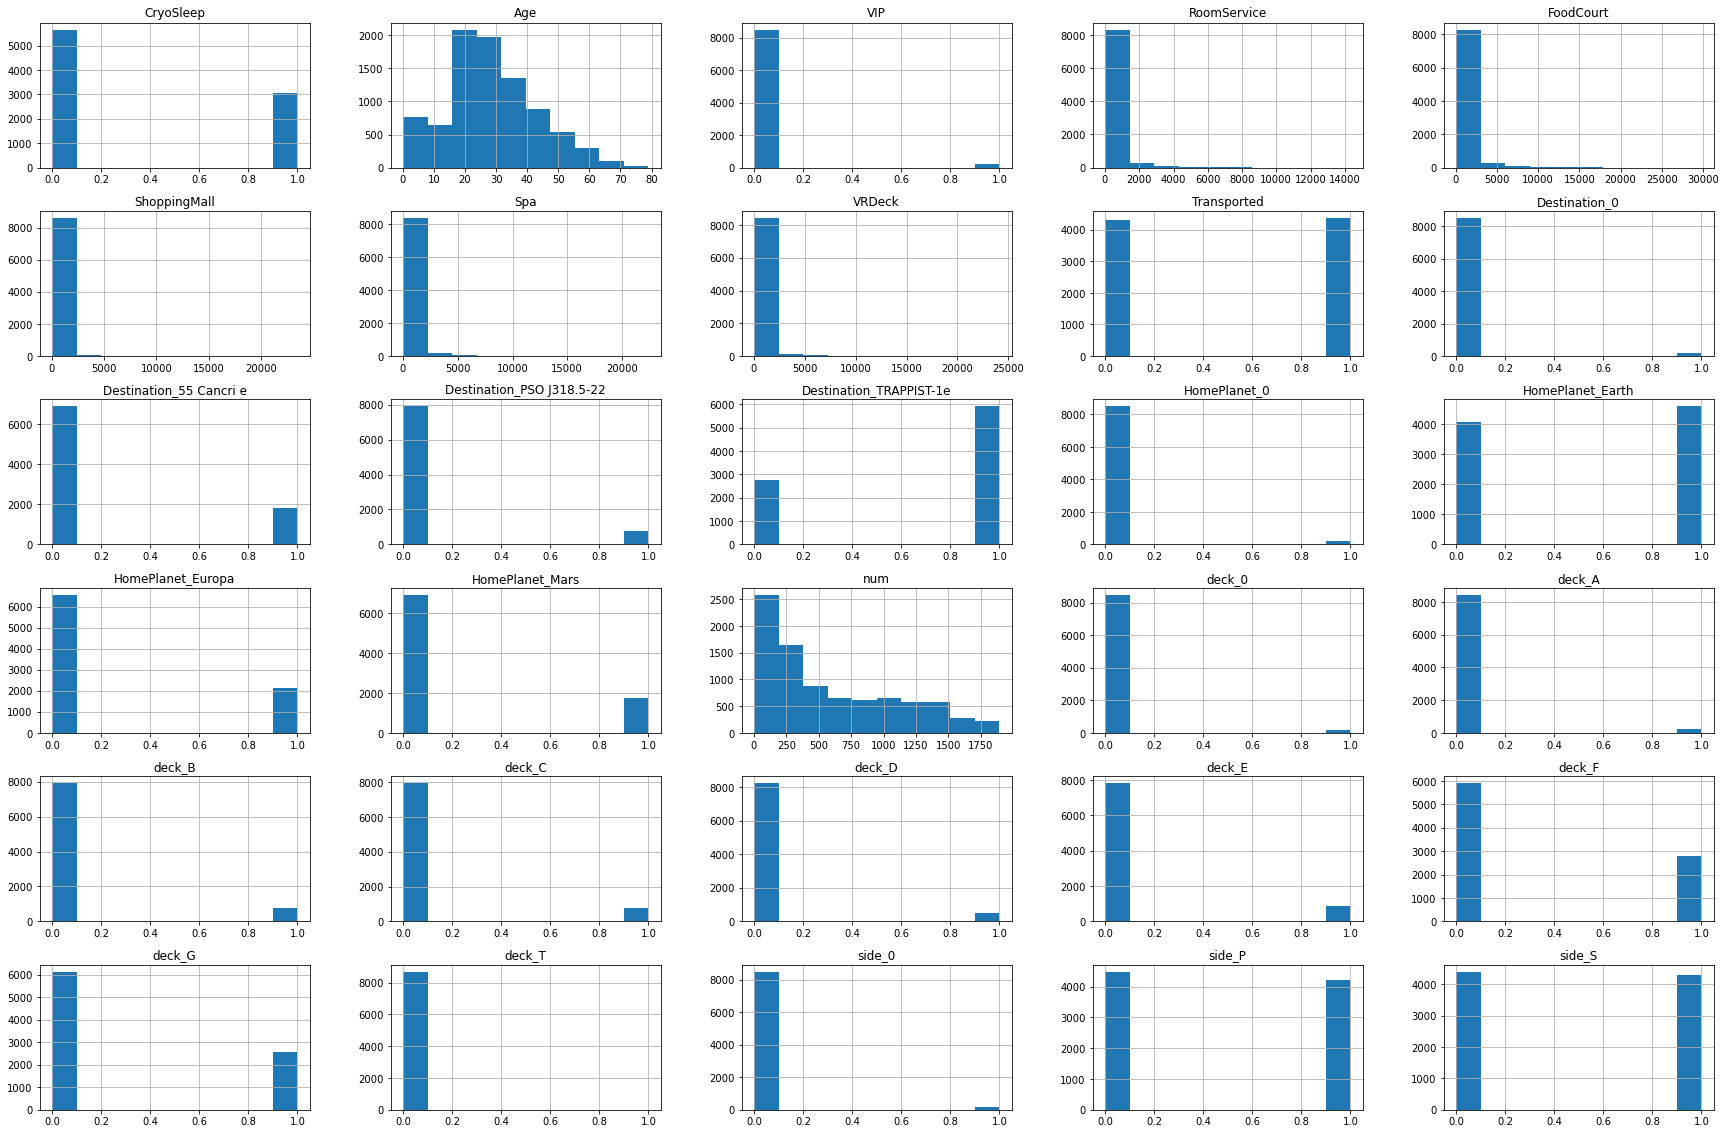

In [22]:
train_data.hist(figsize=(30,20))

- Check mean, std, 50%, 25%, 75% using describe

In [23]:
train_data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_0,...,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_0,side_P,side_S
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.234326,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624,0.020936,...,0.089612,0.085931,0.054987,0.100771,0.321408,0.294375,0.000575,0.022892,0.483838,0.493270
std,0.476796,14.912090,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016,0.143180,...,0.285642,0.280279,0.227968,0.301042,0.467044,0.455787,0.023977,0.149568,0.499767,0.499983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Most of them are biased, so used standiardization

### Check Correlation

In [24]:
target = train_data['Transported']
norm = train_data.drop('Transported', axis = 1)
# z-정규화( x-평균/표준편차)
train_data_normed = (norm- norm.mean())/norm.std()
train_data_normed

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_6533/1961553549.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data_normed = (norm- norm.mean())/norm.std()


,Age,Cabin,CryoSleep,Destination_0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,FoodCourt,HomePlanet_0,HomePlanet_Earth,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,num,side_0,side_P,side_S
0,0.721943,NaN,-0.732728,-0.146225,-0.510984,-0.317468,0.685273,-0.281011,-0.15384,-1.060556,...,-0.306592,-0.241204,-0.334740,-0.688175,-0.645860,-0.023988,-1.141558,-0.153054,1.032805,-0.986574
1,-0.283953,NaN,-0.732728,-0.146225,-0.510984,-0.317468,0.685273,-0.275371,-0.15384,0.942793,...,-0.306592,-0.241204,-0.334740,1.452951,-0.645860,-0.023988,-1.141558,-0.153054,-0.968125,1.013493
2,1.996077,NaN,-0.732728,-0.146225,-0.510984,-0.317468,0.685273,1.959885,-0.15384,-1.060556,...,-0.306592,-0.241204,-0.334740,-0.688175,-0.645860,-0.023988,-1.141558,-0.153054,-0.968125,1.013493
3,0.319585,NaN,-0.732728,-0.146225,-0.510984,-0.317468,0.685273,0.522980,-0.15384,-1.060556,...,-0.306592,-0.241204,-0.334740,-0.688175,-0.645860,-0.023988,-1.141558,-0.153054,-0.968125,1.013493
4,-0.820430,NaN,-0.732728,-0.146225,-0.510984,-0.317468,0.685273,-0.237145,-0.15384,0.942793,...,-0.306592,-0.241204,-0.334740,1.452951,-0.645860,-0.023988,-1.139612,-0.153054,-0.968125,1.013493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.856062,NaN,-0.732728,-0.146225,1.956784,-0.317468,-1.459104,3.992106,-0.15384,-1.060556,...,-0.306592,-0.241204,-0.334740,-0.688175,-0.645860,-0.023988,-0.950852,-0.153054,1.032805,-0.986574
8689,-0.686311,NaN,1.364606,-0.146225,-0.510984,3.149558,-1.459104,-0.281011,-0.15384,0.942793,...,-0.306592,-0.241204,-0.334740,-0.688175,1.548145,-0.023988,1.775465,-0.153054,-0.968125,1.013493
8690,-0.149833,NaN,-0.732728,-0.146225,-0.510984,-0.317468,0.685273,-0.281011,-0.15384,0.942793,...,-0.306592,-0.241204,-0.334740,-0.688175,1.548145,-0.023988,1.777411,-0.153054,-0.968125,1.013493
8691,0.252525,NaN,-0.732728,-0.146225,1.956784,-0.317468,-1.459104,0.376344,-0.15384,-1.060556,...,-0.306592,-0.241204,2.987054,-0.688175,-0.645860,-0.023988,0.041597,-0.153054,-0.968125,1.013493


In [26]:
analysis = pd.merge(train_data_normed, train_data['Transported'],
                left_index = True, right_index=True)

<AxesSubplot:>

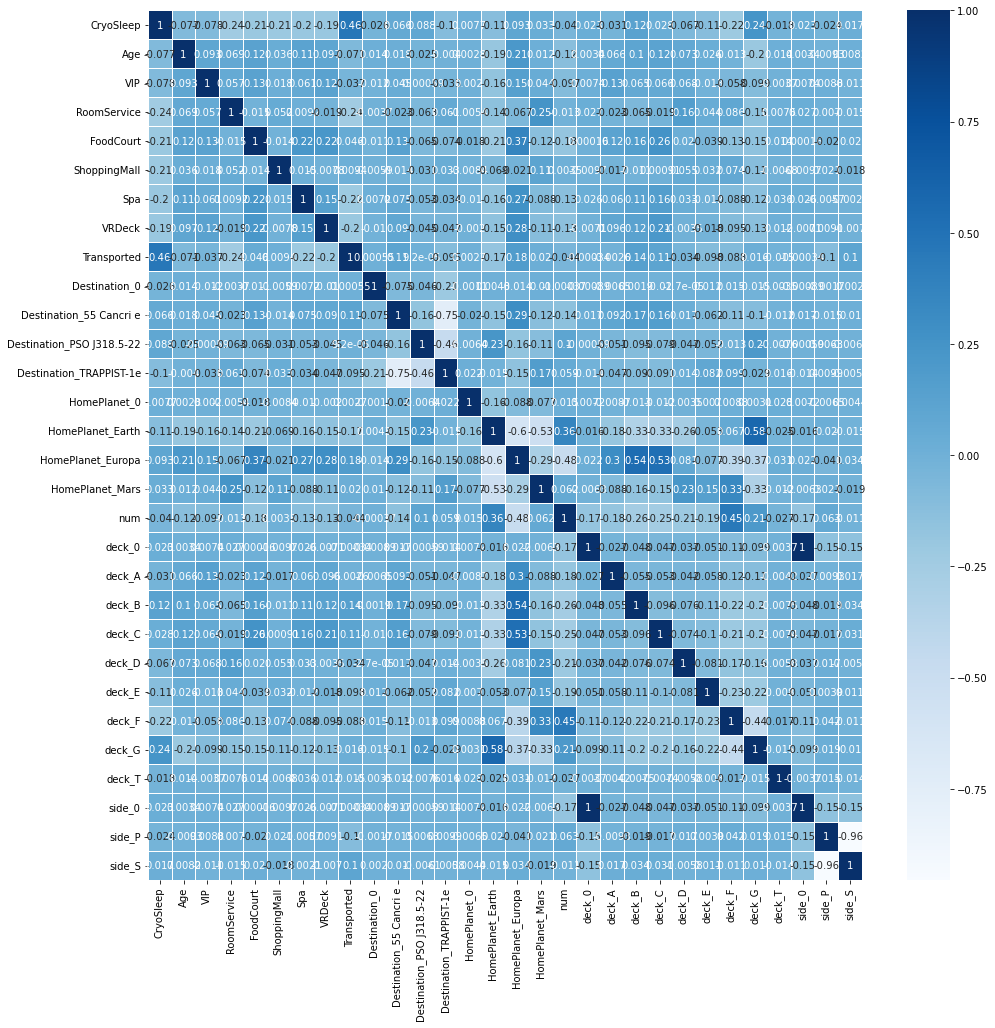

In [27]:
# 선형성 확인
plt.figure(figsize=(16,16))
sns.heatmap(train_data.corr(), linewidths=.5, cmap = 'Blues', annot=True)

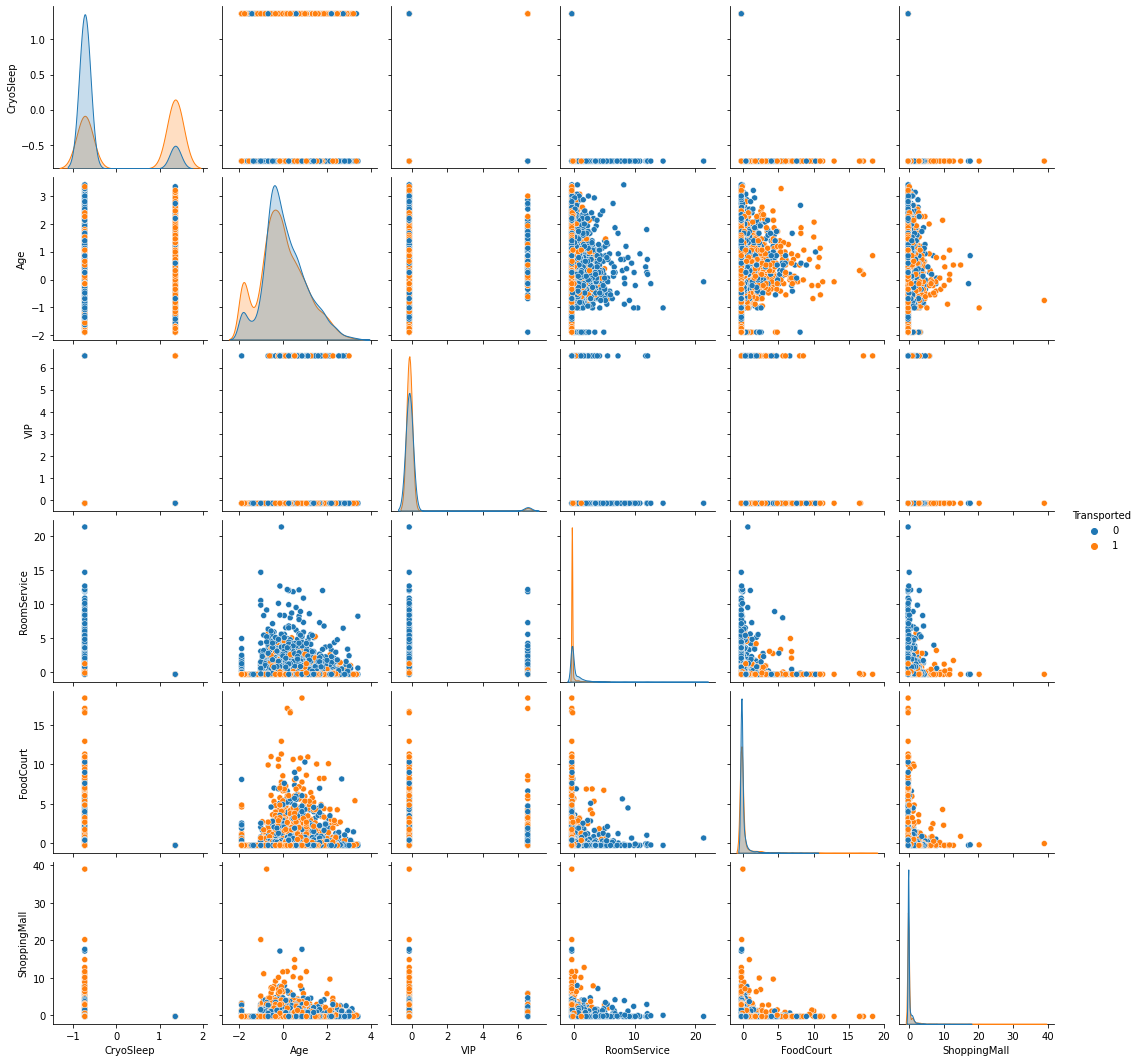

In [32]:
#pairplot with Seaborn
sns.pairplot(analysis[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Transported']],hue='Transported')
plt.show()

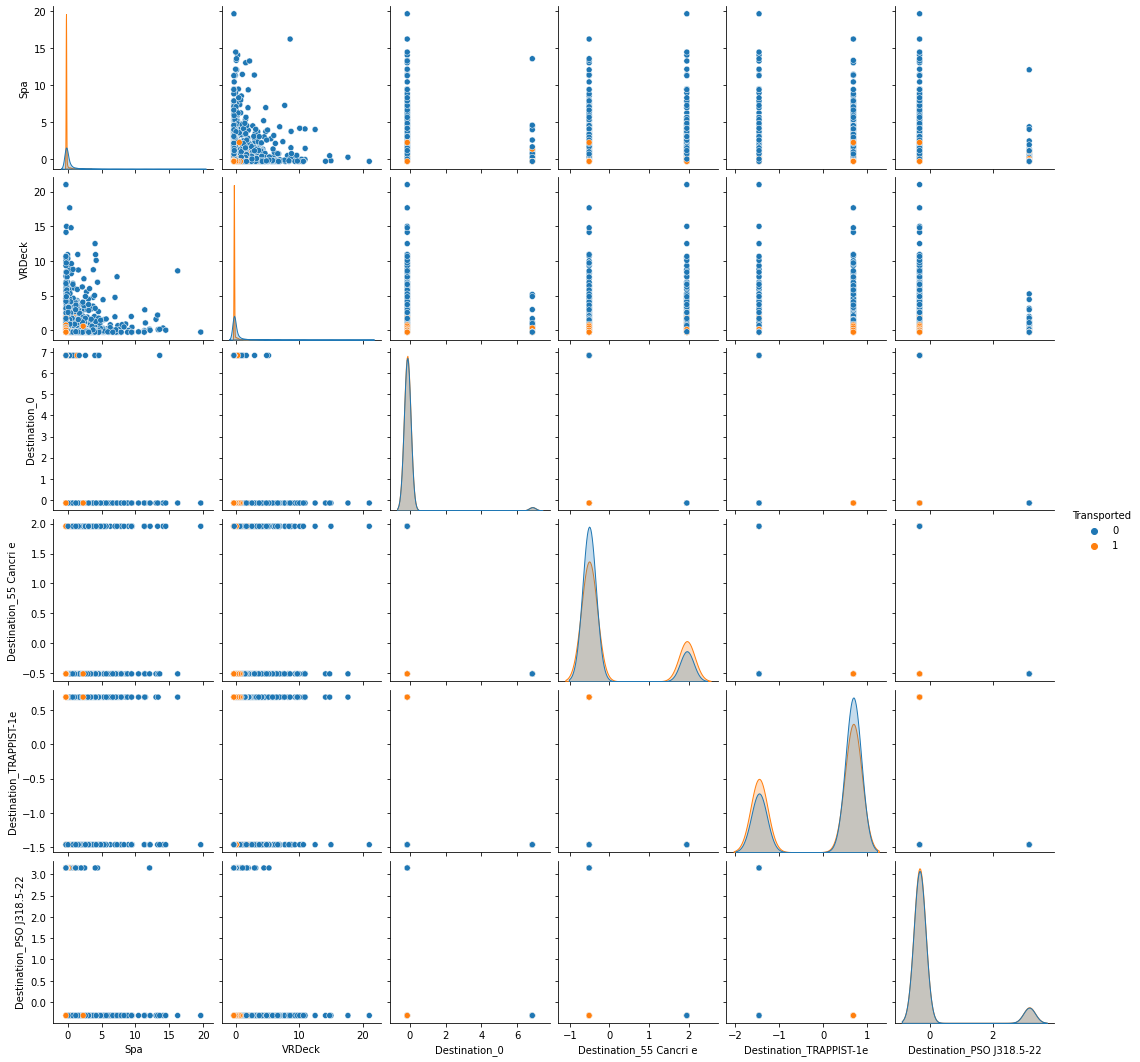

In [33]:
sns.pairplot(analysis[['Spa', 'VRDeck', 'Destination_0', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'Transported']],hue='Transported')
plt.show()

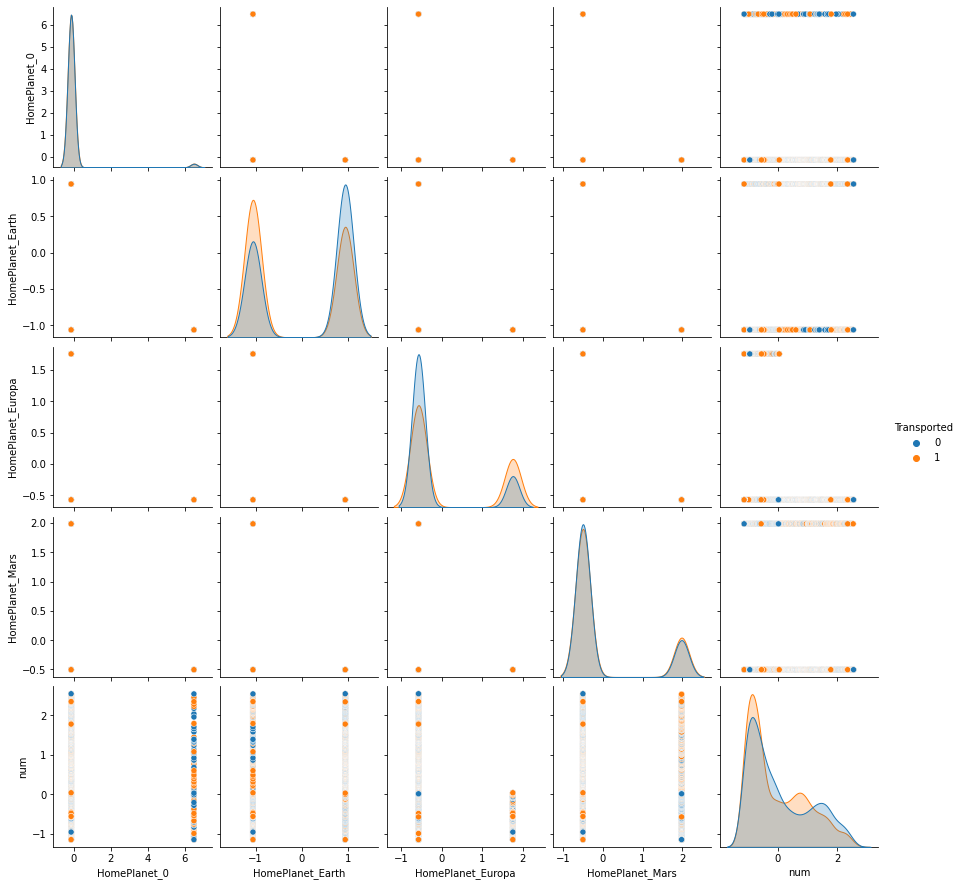

In [34]:
sns.pairplot(analysis[['HomePlanet_0', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'num', 'Transported']],hue='Transported')
plt.show()

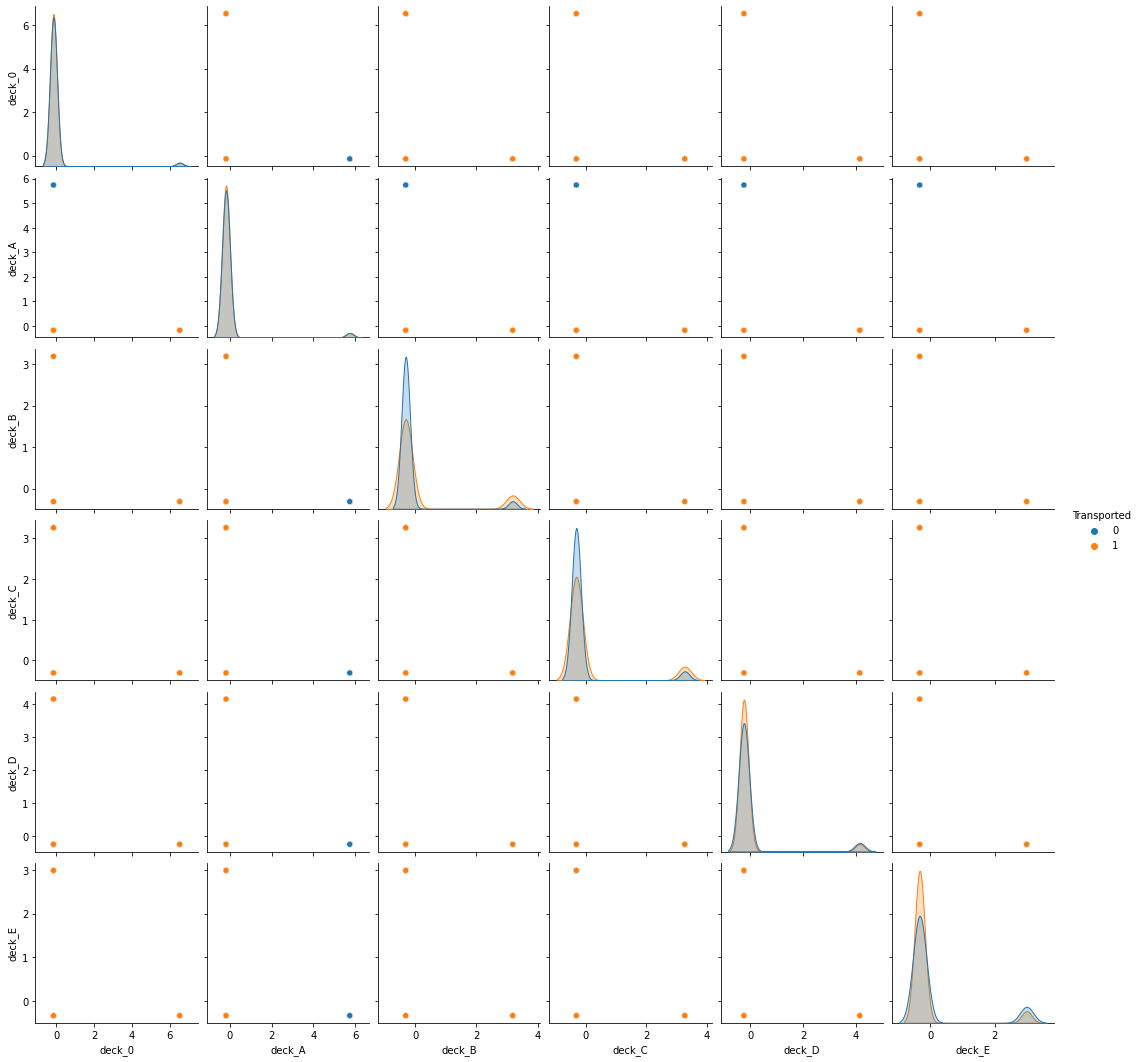

In [36]:
sns.pairplot(analysis[['deck_0', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'Transported']],hue='Transported')
plt.show()

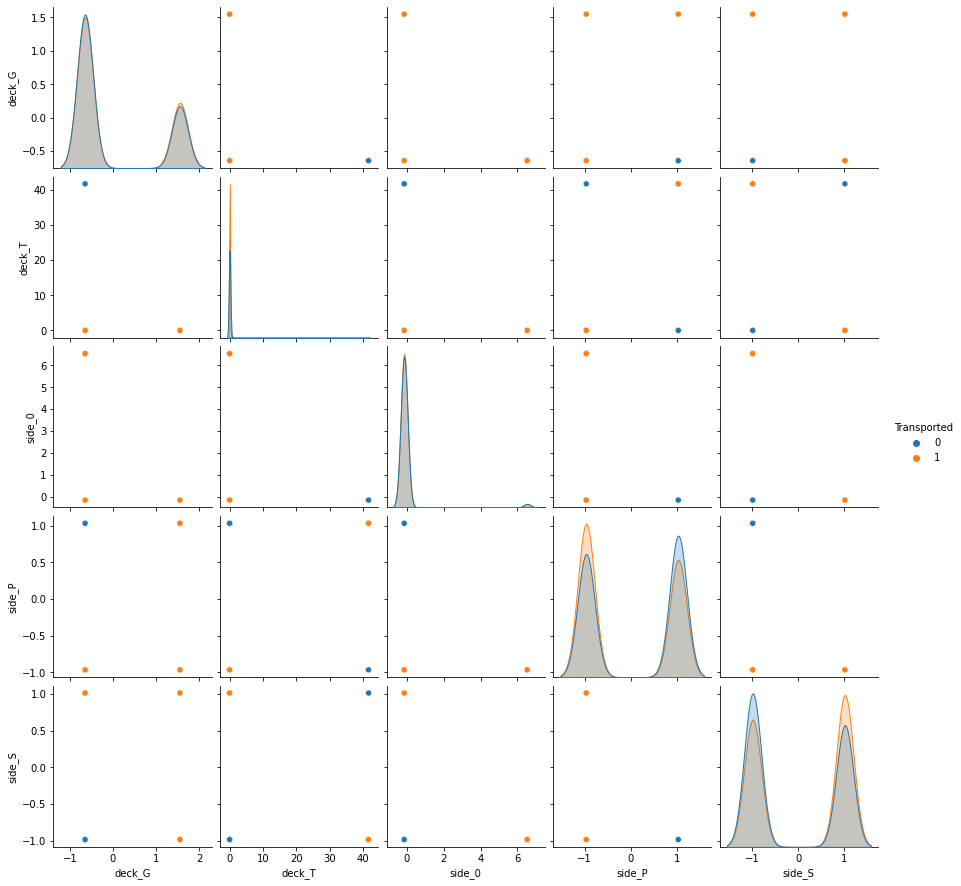

In [37]:
sns.pairplot(analysis[['deck_G', 'deck_T', 'side_0', 'side_P', 'side_S', 'Transported']],hue='Transported')
plt.show()